In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

def hjorth_parameters(signal):
    """
    Compute Hjorth Activity, Mobility, and Complexity.
    Activity = variance of the signal.
    Mobility = sqrt(variance(derivative) / variance(signal)).
    Complexity = (sqrt(variance(second_derivative)/variance(derivative))) / Mobility.
    """
    dx = np.gradient(signal)
    ddx = np.gradient(dx)
    activity = np.var(signal)
    mobility = np.sqrt(np.var(dx) / activity)
    complexity = np.sqrt(np.var(ddx) / np.var(dx)) / mobility
    return activity, mobility, complexity


In [3]:

# Time vector and midpoint for segmentation
t = np.linspace(0, 10, 1000)
mid = 5
noise_std = 0.25
# Signal 1: Illustrating complexity transition
# First half: simple sine; Second half: sine + high-frequency component
signal_complexity = np.where(t < mid, np.sin(t), np.sin(t) + 0.5 * np.sin(10 * t))
signal_complexity[t >= mid] = np.sin(t[t >= mid]) + np.random.normal(0, noise_std, size=np.sum(t >= mid))

# Signal 2: Illustrating mobility transition
# First half: low-frequency sine; Second half: high-frequency sine
signal_mobility = np.where(t < mid, np.sin(20 * t), np.sin(t))

# Compute Hjorth parameters for each half of the complexity signal
idx_first = t < mid
idx_second = t >= mid
_, _, comp_first = hjorth_parameters(signal_complexity[idx_first])
_, _, comp_second = hjorth_parameters(signal_complexity[idx_second])

# Compute Hjorth parameters for each half of the mobility signal
_, mob_first, _ = hjorth_parameters(signal_mobility[idx_first])
_, mob_second, _ = hjorth_parameters(signal_mobility[idx_second])

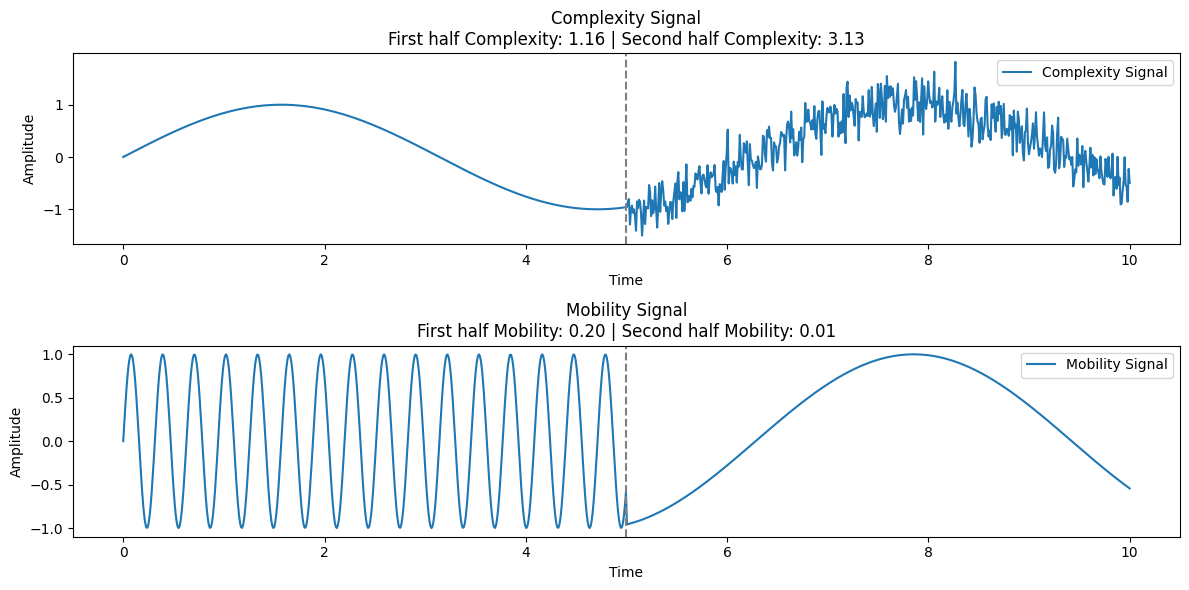

In [21]:
# Plot the complexity signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal_complexity, label='Complexity Signal')
plt.axvline(x=mid, color='gray', linestyle='--')
plt.title(f'Complexity Signal\nFirst half Complexity: {comp_first:.2f} | Second half Complexity: {comp_second:.2f}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot the mobility signal
plt.subplot(2, 1, 2)
plt.plot(t, signal_mobility, label='Mobility Signal')
plt.axvline(x=mid, color='gray', linestyle='--')
plt.title(f'Mobility Signal\nFirst half Mobility: {mob_first:.2f} | Second half Mobility: {mob_second:.2f}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()

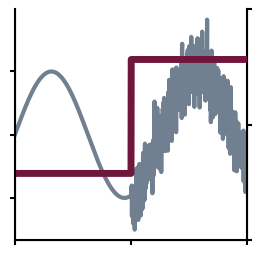

In [41]:
fig, axs = plt.subplots(figsize=(3, 3))

# Plot the complexity signal
axs.plot(t, signal_complexity, label='Complexity Signal', color="slategray", linewidth=3)
ax2 = axs.twinx()
ax2.plot(t, np.where(t < mid, comp_first, comp_second), color="#70163C", linewidth=5)
ax2.set_yticks([0,2,4], labels=[])
axs.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)
axs.set_xlim(0, 10)
axs.set_xticks([0, 5, 10], labels=[])
axs.set_yticks([-1, 0, 1], labels=[])
axs.tick_params(width=1.5)     
ax2.tick_params(width=1.5)  
axs.spines[['left', "bottom", "right"]].set_linewidth(1.5) 
plt.savefig("./complexity_evo.svg", transparent=True)

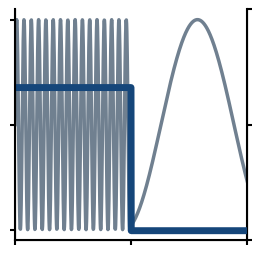

In [39]:
fig, axs = plt.subplots(figsize=(3,3))

# Plot the mobility signal
axs.plot(t, signal_mobility, label='Mobility Signal', color="slategray", linewidth=2.5)
ax2 = axs.twinx()
ax2.plot(t, np.where(t < mid, mob_first, mob_second), color="#15467A", linewidth=5)
ax2.set_yticks([0.0, 0.15, 0.3], labels=[])
axs.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)
axs.set_xlim(0, 10)
axs.set_xticks([0, 5, 10], labels=[])
axs.set_yticks([-1, 0, 1], labels=[])
axs.tick_params(width=1.5)     
ax2.tick_params(width=1.5)  
axs.spines[['left', "bottom", "right"]].set_linewidth(1.5) 
plt.savefig("./mobility_evo.svg", transparent=True)

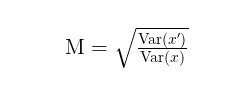

In [54]:
plt.rcParams['text.usetex'] = True  # Enable LaTeX

# Formula using only safe math LaTeX syntax
formula = r"\mathrm{M} = \sqrt{\frac{\mathrm{Var}(x')}{\mathrm{Var}(x)}}"

fig, ax = plt.subplots(figsize=(3, 1))
ax.text(0.5, 0.5, f"${formula}$", fontsize=16, ha='center', va='center')

ax.axis('off')
plt.savefig("mobility_formula.svg", bbox_inches='tight', transparent=True)


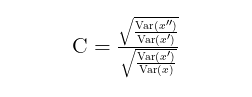

In [56]:
plt.rcParams['text.usetex'] = True  # Enable LaTeX

# Formula using only safe math LaTeX syntax
formula = r"\mathrm{C} = \frac{\sqrt{\frac{\mathrm{Var}(x'')}{\mathrm{Var}(x')}}}{\sqrt{\frac{\mathrm{Var}(x')}{\mathrm{Var}(x)}}}"

fig, ax = plt.subplots(figsize=(3, 1))
ax.text(0.5, 0.5, f"${formula}$", fontsize=16, ha='center', va='center')

ax.axis('off')
plt.savefig("complexity_formula.svg", bbox_inches='tight', transparent=True)
